# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
df_backup = df # в части исследовательского анализа данных мне потребовалось обратиться к оригинальным данным :)

In [2]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

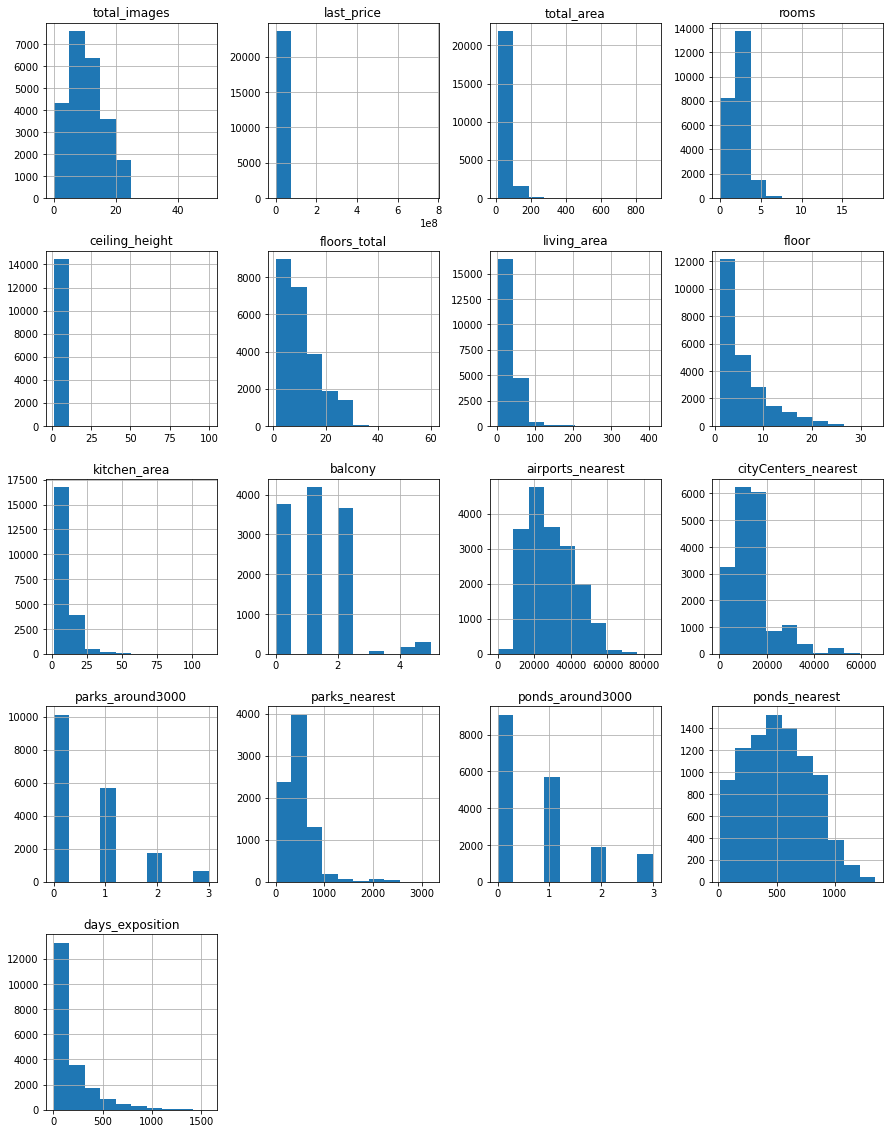

In [4]:
df.hist(figsize=(15, 20))

**Вывод**<br>
После изучения общей информации о данных видно, что в датасете 23699 записей, есть пропуски, некорректные типы данных и выбросы значений

### Выполните предобработку данных

In [5]:
df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)

In [6]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
df['total_images'].unique()

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37])

Значения от 0 до 50. Верхняя граница 50 выглядит как ограничение сервиса. Проблем не вижу.

In [8]:
df['last_price'].unique()

array([13000000.,  3350000.,  5196000., ...,  6151120., 21400000.,
       11475000.])

In [9]:
df['last_price'] = df['last_price'].astype('int')

In [10]:
df['total_area'].unique()

array([108.  ,  40.4 ,  56.  , ...,  66.86, 133.81,  76.75])

Округлим значения общей площади до целого.

In [11]:
df['total_area'] = df['total_area'].round().astype('int')

In [12]:
df['first_day_exposition'].unique()

array(['2019-03-07T00:00:00', '2018-12-04T00:00:00',
       '2015-08-20T00:00:00', ..., '2014-12-29T00:00:00',
       '2016-09-12T00:00:00', '2015-07-19T00:00:00'], dtype=object)

Преобразуем тип данных в datetime.

In [13]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_exposition'].unique()

array(['2019-03-07T00:00:00.000000000', '2018-12-04T00:00:00.000000000',
       '2015-08-20T00:00:00.000000000', ...,
       '2014-12-29T00:00:00.000000000', '2016-09-12T00:00:00.000000000',
       '2015-07-19T00:00:00.000000000'], dtype='datetime64[ns]')

In [14]:
df['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [15]:
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

В столбце с высотой потолков есть пропуски. Можно удалить строки с пропущенным значением или заменить пропуски медианным значением.<br>
Удаление строк приведет к петере около 40% данных, поэтому лучше заполнить пропуски медианами.<br>
Наличие очевидной зависимости между высотой потолка и другими данными датасета для расчета медианного значения высоты потолка в соответствующей категории квартир я не увидел. Поэтому заполнять пропуски буду медианой по всему датасету. Для большей объективности, данный вопрос лучше уточнить у специалистов Яндекс.Недвижимость или соответствующего эксперта.<br>
Также в данных присутствуют аномальные показатели - значения больше 20.0 выглядят странно. Обычно высота потолка состовляет 2.5-3 метра, в случае пентхауса умножаем эти значения на 2, но даже так получить 20 метров сложно.<br>
Подозреваю, при вводе значений, пользователи неправильно поставили точку/запятую, отделяющую дробную часть от целой.<br>
Сначала разделим аномальные значения на 10, а затем расчитаем медиану для замены пропусков.

In [16]:
df.loc[df['ceiling_height']>=20.0, 'ceiling_height'] = df['ceiling_height'] / 10

In [17]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())
#df.loc[df['ceiling_height']>=20.0].sort_values(by='ceiling_height')

В датасете есть незначительное количество пропусков в столбце с количеством этажей в доме. Посмотрим на связь данного значения с ценой.

In [18]:
df['floors_total'].corr(df['last_price'])

-0.006983534007227371

Связь незначительная (почти полностью отсутствует). <br>
Ввиду малого кол-ва строк с пропусками, их можно удалить.

In [19]:
df = df.dropna(subset = ['floors_total'])
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1870
floor                       0
is_apartment            20838
studio                      0
open_plan                   0
kitchen_area             2231
balcony                 11480
locality_name              48
airports_nearest         5532
city_centers_nearest     5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

Пропуски в столбцах living_area заменить средним не получится, т.к. это один из основных параметров квартиры, который напрямую влияет на ее стоимость. Чтобы убедиться в этом предположении, посмотрим на коэффициент корреляции.

In [20]:
df['living_area'].corr(df['last_price'])

0.5663955721081748

Связь есть, но не сильная, т.к. на цену квартиры влияют и другие показатели.

In [21]:
print(df['floor'].unique())
df['floor'].describe()

[ 8  1  4  9 13  5  6 22 26  7  3  2 11 15 18 10 19 16 20 27 25 17 14 12
 21 28 24 23 30 29 32 33 31]


count    23613.000000
mean         5.877313
std          4.873539
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Пропусков и аномальных значений не вижу, проблем нет.

In [22]:
df['is_apartment'].unique()

array([nan, False, True], dtype=object)

Вероятно, пропущенные значения связаны с тем, что пользователи не заполняли данное поле, если квартира НЕ является апартаментами.

In [23]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df['is_apartment'].unique()

/tmp/ipykernel_87/2012338393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_apartment'] = df['is_apartment'].fillna(False)


array([False,  True])

In [24]:
living_area_coef = df['living_area'].median() / df['total_area'].median()
living_area_coef

0.5769230769230769

In [25]:
df['living_area'] = df['living_area'].fillna(df['total_area'] * living_area_coef)
df['living_area'].isna().sum()

/tmp/ipykernel_87/2508399345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['living_area'] = df['living_area'].fillna(df['total_area'] * living_area_coef)


0

In [26]:
kitchen_area_coef = df['kitchen_area'].median() / df['total_area'].median()
kitchen_area_coef

0.175

In [27]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * kitchen_area_coef)
df['kitchen_area'].isna().sum()

/tmp/ipykernel_87/1546530285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * kitchen_area_coef)


0

In [28]:
df['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [29]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'] = df['balcony'].astype('int')
df['balcony'].describe()

/tmp/ipykernel_87/3714471029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balcony'] = df['balcony'].fillna(0)
/tmp/ipykernel_87/3714471029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balcony'] = df['balcony'].astype('int')


count    23613.000000
mean         0.593063
std          0.960307
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

In [30]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [31]:
df['locality_name'] = df['locality_name'].str.lower()
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
df['locality_name'] = df['locality_name'].replace(['садоводческое некоммерческое товарищество ', 'поселок городского типа ',
                                                   'городской поселок ', 'садовое товарищество ', 'коттеджный поселок ', 'поселок ', 
                                                   'деревня ', 'село ', 'пансионат ', 'имени'], '', regex=True)

/tmp/ipykernel_87/3531314875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['locality_name'] = df['locality_name'].str.lower()
/tmp/ipykernel_87/3531314875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['locality_name'] = df['locality_name'].str.replace('ё', 'е')
/tmp/ipykernel_87/3531314875.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [32]:
df = df.dropna(subset = ['locality_name'])
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [33]:
df['locality_name'].isna().sum()

0

Ситуация с airports_nearest, city_centers_nearest, parks_nearest, parks_around3000, ponds_nearest, ponds_around3000 схожая - если не указано, значит, соответствующих объектов рядом нет. Пропущенные значения в переменных, определяющих количесвто, заменю нулями, а расстояние оставлю без изменений.<br>
parks_around3000, ponds_around3000 приведу к целочисленному типу.

In [34]:
df['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Пропуски могут быть связаны с тем, что недвижимость еще не снята с продажи. Но лучше этот момент уточнить у специалистов Яндекс.Недвижимость. Оставляю столбец без изменений.

**Вывод**<br>
В результате, на этапе предобработки были заполнены пропуски в данных там, где это возможно; исправлены некорректные типы данных; названия столбцов приведены к одному стилю.

### Добавьте в таблицу новые столбцы

In [35]:
# цена за квадратный метр
df['price_meter'] = df['last_price'] / df['total_area']
df['price_meter'] = df['price_meter'].round(2)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.000000,8,False,...,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3350000,40,2018-12-04,1,2.65,11.0,18.600000,1,False,...,2,шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,83750.00
2,10,5196000,56,2015-08-20,2,2.65,5.0,34.300000,4,False,...,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
3,0,64900000,159,2015-07-24,3,2.65,14.0,91.730769,9,False,...,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.000000,13,False,...,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00


In [36]:
# день недели публикации 
df['weekday_publish'] = df['first_day_exposition'].dt.weekday
df['weekday_publish'].unique()

array([3, 1, 4, 0, 2, 6, 5])

In [37]:
# месяц публикации 
df['month_publish'] = df['first_day_exposition'].dt.month
df['month_publish'].unique()

array([ 3, 12,  8,  7,  6,  9, 11,  4,  5,  2,  1, 10])

In [38]:
# год публикации 
df['year_publish'] = df['first_day_exposition'].dt.year
df['year_publish'].unique()

array([2019, 2018, 2015, 2017, 2016, 2014])

In [39]:
# тип этажа
def check_floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

In [40]:
df['floor_type'] = df.apply(check_floor, axis=1)
df['floor_type'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

In [41]:
# расстояние до центра в км
df['city_centers_nearest_km'] = (df['city_centers_nearest'] / 1000).round()
df['city_centers_nearest_km'].unique()

array([16., 19., 14.,  7.,  8., nan, 12., 15., 52., 33., 31., 11., 13.,
       10.,  2., 32.,  4., 17., 30.,  5., 51., 50., 24., 18.,  9., 28.,
        3.,  6., 27., 21., 49., 35., 36., 34.,  1., 29., 26., 53., 22.,
       55., 20., 23., 25.,  0., 66., 47., 40., 57., 37., 41., 43., 48.,
       62., 60., 39., 42., 65., 54., 59., 45., 61., 63.])

### Проведите исследовательский анализ данных

In [42]:
df['total_area'].describe()

count    23565.000000
mean        60.315595
std         35.660572
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:title={'center':'Распределение квартир по общей площади'}, ylabel='Frequency'>

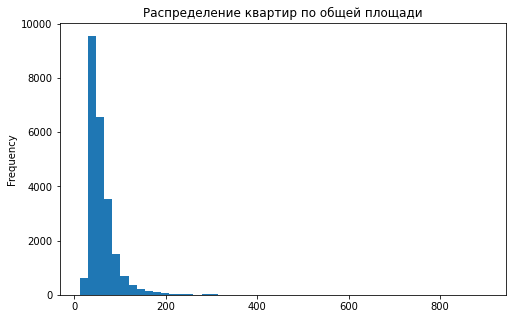

In [43]:
df['total_area'].plot(kind='hist', 
                      bins=50, 
                      title='Распределение квартир по общей площади',
                      figsize=(8, 5))

Значения больше 200 похожи на выбросы, проверим, что будет, если их отбросить

<AxesSubplot:title={'center':'Распределение квартир по общей площади'}, ylabel='Frequency'>

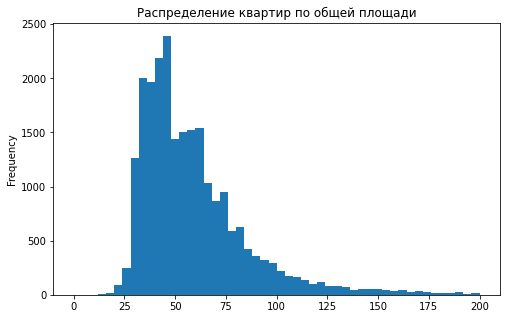

In [44]:
df['total_area'].plot(kind='hist',
                      range=(0, 200),
                      bins=50, 
                      title='Распределение квартир по общей площади',
                      figsize=(8, 5))

Оставим значения от 12 до 130

<AxesSubplot:title={'center':'Распределение квартир по общей площади'}, ylabel='Frequency'>

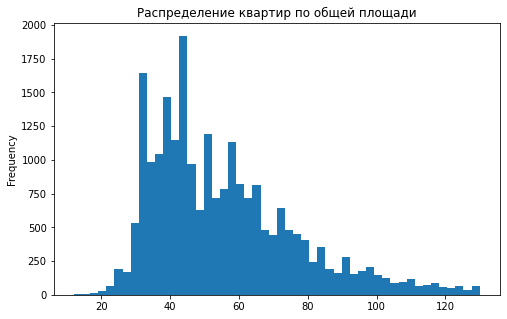

In [45]:
df['total_area'].plot(kind='hist',
                      range=(12, 130),
                      bins=50, 
                      title='Распределение квартир по общей площади',
                      figsize=(8, 5))


In [46]:
df = df.query('12 <= total_area <= 130')

**Ввод**<br>
Больше всего квартир площадью от 30 до 70 квадратных метров. Пик приходится примерно на 39 кв.м.

In [47]:
df['living_area'].describe()

count    22733.000000
mean        31.779363
std         14.273917
min          2.000000
25%         18.700000
50%         30.000000
75%         40.900000
max        101.000000
Name: living_area, dtype: float64

<AxesSubplot:title={'center':'Распределение квартир по жилой площади'}, ylabel='Frequency'>

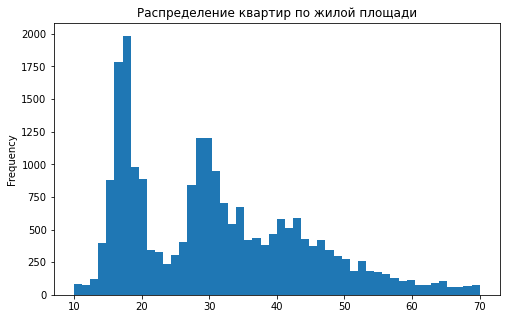

In [48]:
df['living_area'].plot(kind='hist',
                       range=(10, 70),
                       bins=50, 
                       title='Распределение квартир по жилой площади',
                       figsize=(8, 5))

Данные имеют бимодальное распределение с пиками в 18 и 30 кв.м. с просадкой в зоне 20-25 кв.м.<br>
Интересно посмотреть, как относится жилая площадь к общей.

In [49]:
(df['living_area'] / df['total_area']).describe()

count    22733.000000
mean         0.565189
std          0.100517
min          0.038462
25%          0.500000
50%          0.576923
75%          0.630435
max          1.008333
dtype: float64

In [50]:
df.loc[df['living_area'] > df['total_area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter,weekday_publish,month_publish,year_publish,floor_type,city_centers_nearest_km
12691,1,3700000,24,2017-11-10,0,2.65,19.0,24.2,13,False,...,NaN,2.0,210.0,74.0,154166.67,4,11,2017,другой,17.0


Возможно, причина кроется в моих преобразованиях.

In [51]:
df_backup.loc[df_backup['living_area'] > df_backup['total_area']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12691,1,3700000,24,2017-11-10,0,2.65,19.0,24.2,13,NaN,...,NaN,1.0,Санкт-Петербург,17837.0,16840.0,0.0,NaN,2.0,210.0,74.0


В большинстве случаев жилая площадь составляет 50-60% от общей площади. Есть единичный случай, когда жилая площадь незначительно больше общей. 

In [52]:
df = df.query('10 <= living_area <= 70')

In [53]:
df['kitchen_area'].describe()

count    22327.000000
mean         9.877325
std          4.560826
min          1.300000
25%          7.000000
50%          9.000000
75%         11.275000
max         64.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:title={'center':'Распределение квартир по площади кухни'}, ylabel='Frequency'>

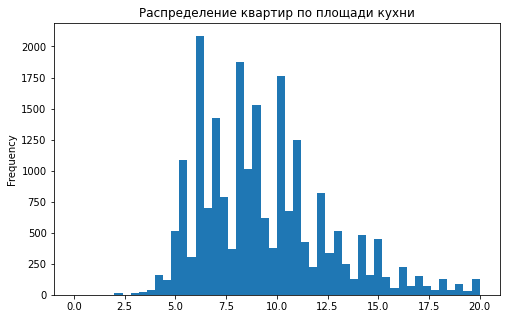

In [54]:
df['kitchen_area'].plot(kind='hist',
                       range=(0, 20),
                       bins=50, 
                       title='Распределение квартир по площади кухни',
                       figsize=(8, 5))

<AxesSubplot:title={'center':'Распределение квартир по площади кухни'}, ylabel='Frequency'>

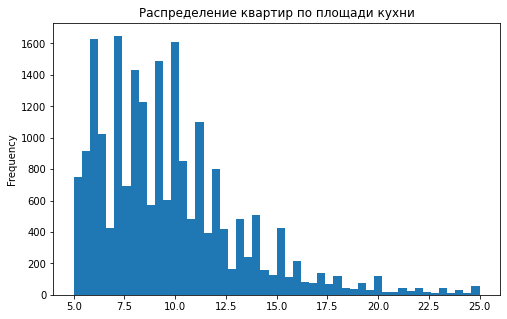

In [55]:
df['kitchen_area'].plot(kind='hist',
                       range=(5, 25),
                       bins=50, 
                       title='Распределение квартир по площади кухни',
                       figsize=(8, 5))

Больше всего квартир без кухни. В остальных случаях больше всего значений в диапазоне от 5 до 12 кв.м.<br>
Интересный факт: пики приходятся на целые значения; либо это педантичные застройщики, либо люди указывают площадь кухни не из паспорта объекта, а берут значения по памяти.

In [56]:
df = df.query('5 <= kitchen_area <= 25')

In [57]:
df['last_price'].describe()

count    2.160500e+04
mean     5.291430e+06
std      3.432368e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.500000e+06
75%      6.250000e+06
max      1.240000e+08
Name: last_price, dtype: float64

<AxesSubplot:title={'center':'Распределение квартир по последней цене (млн. руб)'}, ylabel='Frequency'>

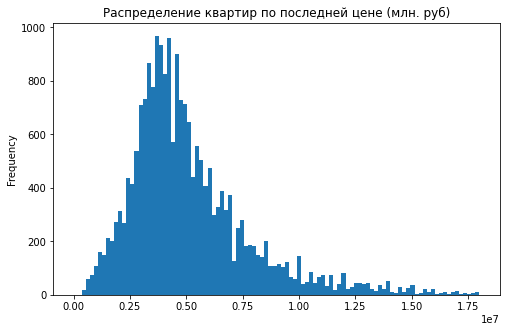

In [58]:
df['last_price'].plot(kind='hist',
                      range=(0, 18e+06),
                      bins=100, 
                      title='Распределение квартир по последней цене (млн. руб)',
                      figsize=(8, 5))

Распределение нормальное, больше всего предложений от 3.5 до 5 млн. рублей.

In [59]:
df = df.query('last_price <= 18e+06')

In [60]:
df['rooms'].describe()

count    21418.000000
mean         1.954011
std          0.878629
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

<AxesSubplot:title={'center':'Распределение квартир по кол-ву комнат'}, ylabel='Frequency'>

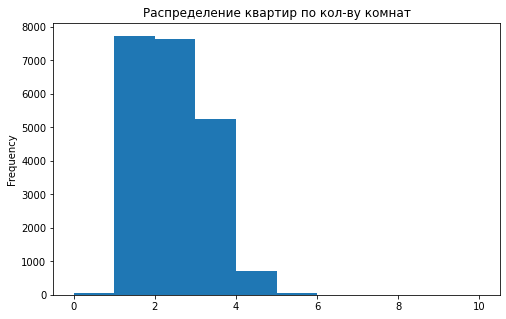

In [61]:
df['rooms'].plot(kind='hist',
                      range=(0, 10),
                      bins=10, 
                      title='Распределение квартир по кол-ву комнат',
                      figsize=(8, 5))

Наблюдается обратная линейная зависимость: чем больше комнат, тем меньше предложений.

In [62]:
df = df.query('0 <= rooms <= 10')

In [63]:
df['ceiling_height'].describe()

count    21418.000000
mean         2.677393
std          0.227676
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:title={'center':'Распределение квартир по высоте потолков'}, ylabel='Frequency'>

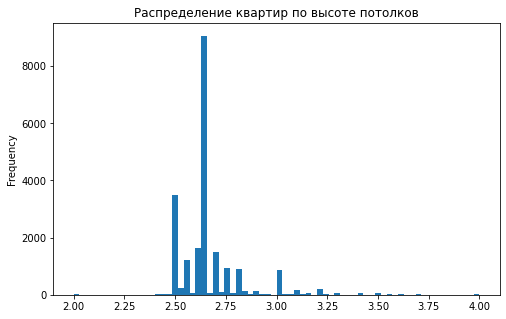

In [64]:
df['ceiling_height'].plot(kind='hist',
                       range=(2, 4),
                       bins=70, 
                       title='Распределение квартир по высоте потолков',
                       figsize=(8, 5))

Больше всего квартир с высотой потолка 2.6 метра.

In [65]:
df = df.query('2 <= ceiling_height <= 4')

<AxesSubplot:title={'center':'Распределение квартир в зависимости от этажа'}>

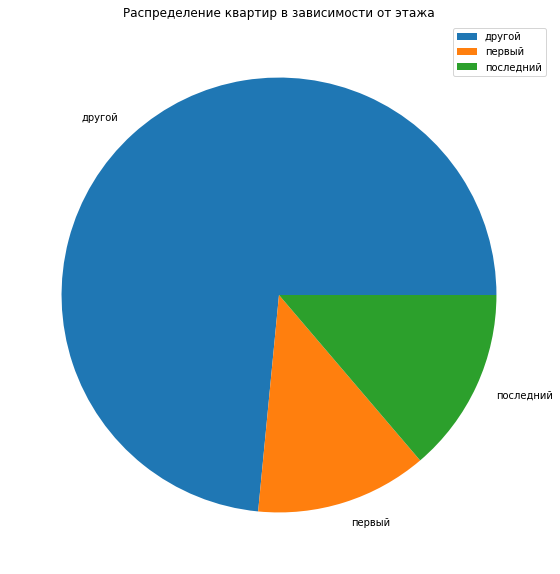

In [66]:
(df
  .pivot_table(index='floor_type',values='ceiling_height',aggfunc='count')
  .plot(kind='pie', y='ceiling_height',label='', figsize=(10, 10), title='Распределение квартир в зависимости от этажа')
)


Больше всего квартир ни на первом, ни на последнем этаже. Что логично, ведь первый и последний этаж - это крайности.

In [67]:
df['floors_total'].describe()

count    21383.000000
mean        10.766310
std          6.594114
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:title={'center':'Распределение квартир по кол-ву этажей в доме'}, ylabel='Frequency'>

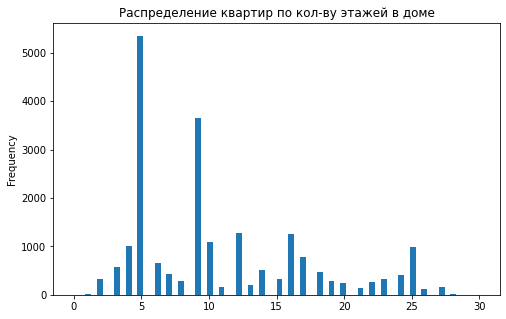

In [68]:
df['floors_total'].plot(kind='hist',
                       range=(0, 30),
                       bins=70, 
                       title='Распределение квартир по кол-ву этажей в доме',
                       figsize=(8, 5))

В данных наблюдается два пика: на 5 и 9 этажах с преобладанием пятиэтажных зданий.

In [69]:
df['city_centers_nearest'].describe()

count    16155.000000
mean     14827.071557
std       8484.356005
min        208.000000
25%      10428.000000
50%      13495.000000
75%      16596.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

<AxesSubplot:title={'center':'Распределение квартир по расстоянию до центра города'}, ylabel='Frequency'>

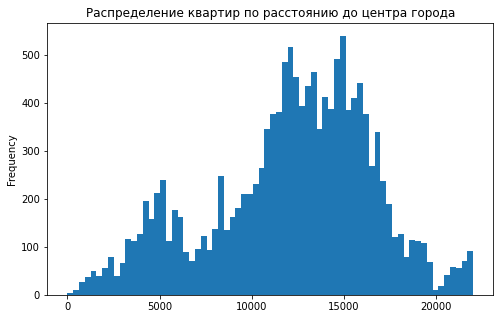

In [70]:
df['city_centers_nearest'].plot(kind='hist',
                       range=(0, 22000),
                       bins=70, 
                       title='Распределение квартир по расстоянию до центра города',
                       figsize=(8, 5))

Основная масса квартир сконцентрирована в 10-18 км от центра, в центральных квартирах наблюдается локальный максимум в 5 км.

In [71]:
df['parks_nearest'].describe()

count    6870.000000
mean      492.426783
std       335.983971
min         1.000000
25%       289.000000
50%       458.000000
75%       615.750000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:title={'center':'Распределение квартир по расстоянию до ближайшего парка'}, ylabel='Frequency'>

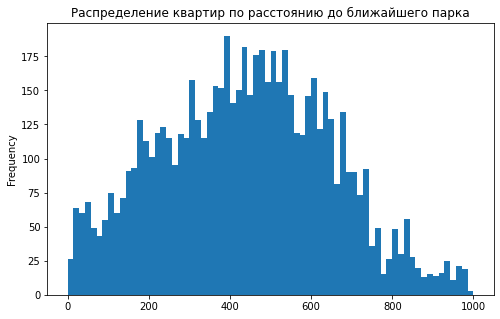

In [72]:
df['parks_nearest'].plot(kind='hist',
                       range=(0, 1000),
                       bins=70, 
                       title='Распределение квартир по расстоянию до ближайшего парка',
                       figsize=(8, 5))

Основная масса квартир находится на расстоянии 150-750 метров от парка (экологи должны быть в восторге).

In [73]:
df.shape[0] / df_backup.shape[0]

0.9022743575678299

In [74]:
# Как быстро продавались квартиры
df['days_exposition'].describe()

count    18689.000000
mean       174.301942
std        212.069340
min          1.000000
25%         44.000000
50%         92.000000
75%        221.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:title={'center':'Как быстро продавались квартиры'}, ylabel='Frequency'>

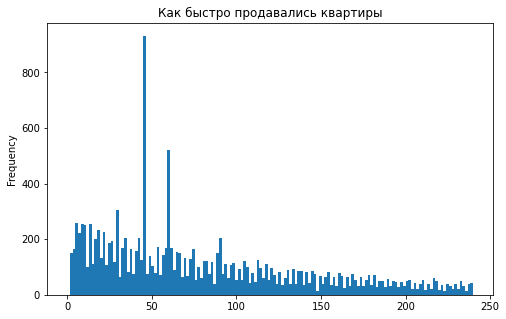

In [75]:
df['days_exposition'].plot(kind='hist',
                       range=(0, 240),
                       bins=150, 
                       title='Как быстро продавались квартиры',
                       figsize=(8, 5))

На графике пиковые значения являются следствием изменения правил Яндекс.Недвижимость.<br>
Судя по квартилям, быстрыми продажами можно назвать продажи быстрее 44 дней, а долгими - дольше 221 дня.<br>
Рекомендовано добавить в данные метку, кто снял обхявление: человек или система.

In [77]:
# факторы, которые больше всего влияют на общую (полную) стоимость объекта
# ['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor', 'weekday_publish', 'month_publish', 'year_publish']
df.pivot_table(index='total_images', 
               values=['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 
                       'floor', 'weekday_publish', 'month_publish', 'year_publish']
              ).corr()['last_price']


floor              0.410013
kitchen_area       0.703351
last_price         1.000000
living_area        0.535732
month_publish      0.060774
rooms              0.553206
total_area         0.764871
weekday_publish    0.154586
year_publish       0.163826
Name: last_price, dtype: float64

In [ ]:
(
    df
    .pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(kind='bar', grid=True, figsize=(8, 5))
)

'Другой' превосходит остальные типы этажа, за ним следует 'последний' и самым дешевым считается 'первый'

In [ ]:
(
    df
    .pivot_table(index='weekday_publish', values='last_price', aggfunc='median')
    .plot(kind='bar', grid=True, figsize=(8, 5))
)

Заметной связи нет

In [ ]:
(
    df
    .pivot_table(index='month_publish', values='last_price', aggfunc='median')
    .plot(kind='bar', grid=True, figsize=(8, 5))
)

Выгоднее всего размещать объявление в апреле, а самые дешевые квартиры приходятся на июнь. Остальные месяцы равны между собой.

In [ ]:
(
    df
    .pivot_table(index='year_publish', values='last_price', aggfunc='median')
    .plot(kind='bar', grid=True, figsize=(8, 5))
)

Цены опускались до 2017 года, затем начали подниматься. Вероятно, это связано с кризисом 2016-2017 года (https://tass.ru/ekonomika/3983262)

In [ ]:
import seaborn as sns

In [ ]:
sns.pairplot(df,
            x_vars=['total_area', 'living_area', 'kitchen_area'],
            y_vars='last_price',
            dropna=True,
            height=5,
            aspect=1.5,
            )

Во всех случаях наблюдается прямая линейная зависимость. Цена квартиры больше зависит от общей площади квартиры. С жилой площадью и площадью кухни связь слабее, но есть.

In [ ]:
# средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
(df
 .pivot_table(index='locality_name', values='price_meter', aggfunc={'count', 'mean'})
 .sort_values(by='count', ascending=False)
 .head(10)
)

In [ ]:
# средняя стоимость квартиры в Санкт-Петербурге в зависимости от расстояния до центра
(df
 .query('locality_name == "санкт-петербург"')
 .pivot_table(index='city_centers_nearest_km',
              values='last_price',
              aggfunc={'mean', 'median'})
)

In [ ]:

(df
 .query('locality_name == "санкт-петербург"')
 .pivot_table(index='city_centers_nearest_km', 
              values='last_price', 
              aggfunc={'mean', 'median'})
 .plot(style='o-', 
       grid=True, 
       figsize=(8, 5), 
       title='Зависимость стоимости квартиры от расстояния до центра',
       ylabel='Цена, 10 млн руб',
       xlabel='Расстояние до центра, км')
)

**Вывод**<br>
Чем дальше от центра, тем дешевле квартиры

**Вывод**<br>
Опираясь на результаты исследовательского анализа, можно делать следующие выводы:
1) Больше всего квартир с площадью от 30 до 70 квадратных метров (с пиком в 39 кв.м.)<br>
2) Пиковые объемы предложений приходятся на квартиры с жилой площадью около 18 и 30 кв.м. В среднем, жилая площадь составляет 50-60% от общей.<br>
3) Сравнивая количество предложений по площади кухни, имеем следующую ситуацию: самая большая группа - квартиры без кухни; если кухня есть, в большинстве случаев ее площадь составляет от 5 до 12 кв.м. Так же у пользователей наблюдается тенденция указывать целые значения в графе площадь кухни - возможно, они указывают примерные значения, опираясь на свою память, а не из документов на квартиру.<br>
4) Большинство квартир стоят от 3 до 5 млн. рублей.<br>
5) Выявлена обратная линейная зависимость между количеством комнат в квартире и количеством предложений: чем больше комнат, тем меньше предложений.<br>
6) "Нормальным" значением высоты потолка можно считать 2.6 метра.<br>
7) Больше всего квартир ни на первом, ни на последнем этаже.<br>
8) В сервисе преобладают квартиры в девяти- и пятиэтажных зданиях.<br>
9) Основная масса квартир сконцентрирована в 10-18 км от центра, в центральных квартирах наблюдается локальный максимум в 5 км.<br>
10) Основная масса квартир находится на расстоянии 150-750 метров от парка.<br>
11) Большинство квартир было продано за 1-2 месяца. Медиана составляет 3 месяца<br>
12) Цена квартиры линейно зависит от общей площади. Лучше всего размещать объявления в апреле, хуже - в июне. На цены квартир значительно повлял кризис 2016-2017 года, в данный период наблюдалась сильная просадка с дальнейшим плавным ростом.<br>
13) В Санкт-Петербурге больше всего предложений и самые дорогие квартиры по сравнению с областью.<br>



### Напишите общий вывод

В предоставленном наборе данных было 23699 записей. Устранены пропуски в столбцах, где это было возможно, замечены и отсеяны аномальные значения, переименованы столбцы, столбцам присвоены типы данных.<br>
Для проведения анализа в датасет были добавлены новые столбцы:<br>
1) price_meter - цена за квадратный метр <br>
2) weekday_publish - день недели публикации объявления<br>
3) month_publish - месяц публикации объявления<br>
4) year_publish - год публикации объявления<br>
5) floor_type - тип этажа (первый, последний, другой)<br>
6) city_centers_nearest_km - расстояние до центра в км<br>
<br>
В результате исследовательского анализа были выявлены следующие закономерности: <br>
1) Больше всего квартир с площадью от 30 до 70 квадратных метров (с пиком в 39 кв.м.)<br>
2) Пиковые объемы предложений приходятся на квартиры с жилой площадью около 18 и 30 кв.м. В среднем, жилая площадь составляет 50-60% от общей.<br>
3) Сравнивая количество предложений по площади кухни, имеем следующую ситуацию: самая большая группа - квартиры без кухни; если кухня есть, в большинстве случаев ее площадь составляет от 5 до 12 кв.м. Так же у пользователей наблюдается тенденция указывать целые значения в графе площадь кухни - возможно, они указывают примерные значения, опираясь на свою память, а не из документов на квартиру.<br>
4) Большинство квартир стоят от 3 до 5 млн. рублей.<br>
5) Выявлена обратная линейная зависимость между количеством комнат в квартире и количеством предложений: чем больше комнат, тем меньше предложений.<br>
6) "Нормальным" значением высоты потолка можно считать 2.6 метра.<br>
7) Больше всего квартир ни на первом, ни на последнем этаже.<br>
8) В сервисе преобладают квартиры в девяти- и пятиэтажных зданиях.<br>
9) Основная масса квартир сконцентрирована в 10-18 км от центра, в центральных квартирах наблюдается локальный максимум в 5 км.<br>
10) Основная масса квартир находится на расстоянии 150-750 метров от парка.<br>
11) Большинство квартир было продано за 1-2 месяца. Медиана составляет 3 месяца<br>
12) Цена квартиры линейно зависит от общей площади. Лучше всего размещать объявления в апреле, хуже - в июне. На цены квартир значительно повлял кризис 2016-2017 года, в данный период наблюдалась сильная просадка с дальнейшим плавным ростом.<br>
13) В Санкт-Петербурге больше всего предложений и самые дорогие квартиры по сравнению с областью.<br>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.